In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Safegraph-research/nyc-data/nyc_0218.csv',
                 dtype={'brands': 'object',
                'closed_on': 'object',
                'postal_code': 'object',
                'countyfips': 'object',
                'opened_on': 'object',
                'safegraph_brand_ids': 'object',    
                'poi_cbg': 'object'})
df.head(2)

,date_range_start,placekey,location_name,brands,latitude,longitude,region,postal_code,iso_country_code,opened_on,closed_on,tracking_closed_since,raw_visit_counts,raw_visitor_counts,visits_by_day,visitor_home_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,related_same_day_brand.1,poi_cbg,visitor_home_aggregation,visitor_daytime_cbgs,countyfips,year,month
0,2019-01-07,224-223@627-s8j-tsq,New York University Langone Medical Center,NaN,40.741854,-73.974095,NY,10016,US,NaN,NaN,2019-07-01,71.0,42.0,"[5,18,16,10,16,5,1]","{""360470098004"":4,""360610285002"":4,""3605952180...","{""US"":39}",7.726751,231.0,"{""<5"":1,""5-10"":4,""11-20"":1,""21-60"":8,""61-120"":...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...","{""Starbucks"":14,""Dunkin'"":10,""Walmart"":7,""Targ...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...",360610062001,"{""36081032800"":4,""36047001500"":4,""36085024700""...","{""360610062001"":11,""360470050002"":4,""360470015...",36061,2019,1
1,2019-01-07,zzw-222@627-s8s-2zf,Kofinas Fertility Group,NaN,40.772198,-73.979171,NY,10023,US,NaN,NaN,2019-07-01,46.0,38.0,"[3,9,4,16,2,7,5]","{""360610132004"":4,""360595182041"":4,""3606101490...","{""US"":29,""TZ"":4}",8.070369,9.5,"{""<5"":5,""5-10"":20,""11-20"":5,""21-60"":6,""61-120""...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...","{""Starbucks"":26,""McDonald's"":24,""CVS"":13,""Dunk...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...",360610149002,"{""36047043600"":4,""36061019300"":4,""36081015802""...","{""360610149003"":4,""360050221013"":4,""3606101550...",36061,2019,1


In [ ]:
df.dtypes

date_range_start              object
placekey                      object
location_name                 object
brands                        object
latitude                     float64
longitude                    float64
region                        object
postal_code                   object
iso_country_code              object
opened_on                     object
closed_on                     object
tracking_closed_since         object
raw_visit_counts             float64
raw_visitor_counts           float64
visits_by_day                 object
visitor_home_cbgs             object
visitor_country_of_origin     object
distance_from_home           float64
median_dwell                 float64
bucketed_dwell_times          object
related_same_day_brand        object
related_same_week_brand       object
related_same_day_brand.1      object
poi_cbg                       object
visitor_home_aggregation      object
visitor_daytime_cbgs          object
countyfips                    object
y

In [ ]:
print("Note: each row is a unique Point of Interest (POI) \nand every POI has a unique placekey.\n")

print("number of rows:")
print(df.shape[0]) 
print("number of unique sgpids:")
print(df.placekey.unique().shape[0]) 
print('\n')

Note: each row is a unique Point of Interest (POI) 
and every POI has a unique placekey.

number of rows:
324718
number of unique sgpids:
7126




In [ ]:
df.shape

(324718, 29)

In [ ]:
%%time
df['date_range_start'] = pd.to_datetime(df['date_range_start'])
df = df.set_index('date_range_start')  # taking long
df = df.sort_index()

CPU times: user 308 ms, sys: 124 ms, total: 432 ms
Wall time: 441 ms


In [ ]:
df.head(2)

,placekey,location_name,brands,latitude,longitude,region,postal_code,iso_country_code,opened_on,closed_on,tracking_closed_since,raw_visit_counts,raw_visitor_counts,visits_by_day,visitor_home_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,related_same_day_brand.1,poi_cbg,visitor_home_aggregation,visitor_daytime_cbgs,countyfips,year,month
date_range_start,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-07,224-223@627-s8j-tsq,New York University Langone Medical Center,NaN,40.741854,-73.974095,NY,10016,US,NaN,NaN,2019-07-01,71.0,42.0,"[5,18,16,10,16,5,1]","{""360470098004"":4,""360610285002"":4,""3605952180...","{""US"":39}",7.726751,231.0,"{""<5"":1,""5-10"":4,""11-20"":1,""21-60"":8,""61-120"":...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...","{""Starbucks"":14,""Dunkin'"":10,""Walmart"":7,""Targ...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...",360610062001,"{""36081032800"":4,""36047001500"":4,""36085024700""...","{""360610062001"":11,""360470050002"":4,""360470015...",36061,2019,1
2019-01-07,zzw-222@627-s8s-2zf,Kofinas Fertility Group,NaN,40.772198,-73.979171,NY,10023,US,NaN,NaN,2019-07-01,46.0,38.0,"[3,9,4,16,2,7,5]","{""360610132004"":4,""360595182041"":4,""3606101490...","{""US"":29,""TZ"":4}",8.070369,9.5,"{""<5"":5,""5-10"":20,""11-20"":5,""21-60"":6,""61-120""...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...","{""Starbucks"":26,""McDonald's"":24,""CVS"":13,""Dunk...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...",360610149002,"{""36047043600"":4,""36061019300"":4,""36081015802""...","{""360610149003"":4,""360050221013"":4,""3606101550...",36061,2019,1


# distance_from_home

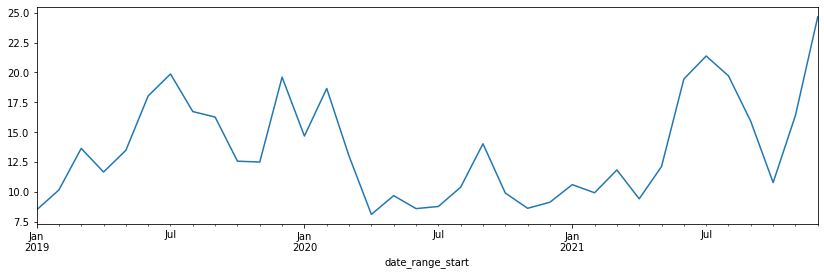

In [ ]:
df.resample('M').mean()['distance_from_home'].plot(figsize=(14,4));

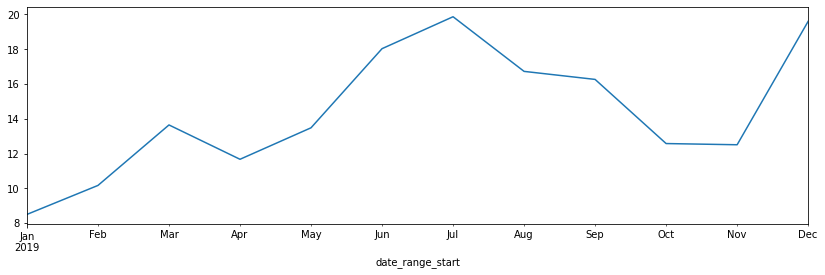

In [ ]:
df.loc['2019'].resample('M').mean()['distance_from_home'].plot(figsize=(14,4));

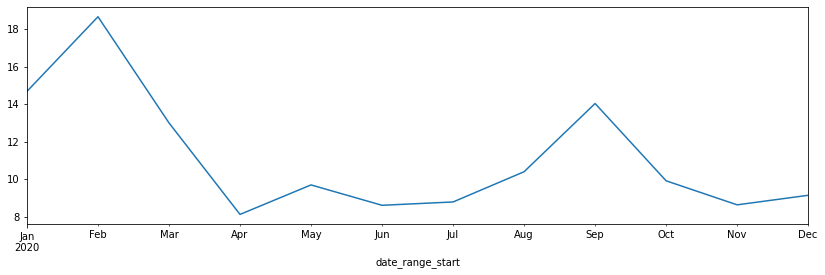

In [ ]:
df.loc['2020'].resample('M').mean()['distance_from_home'].plot(figsize=(14,4));

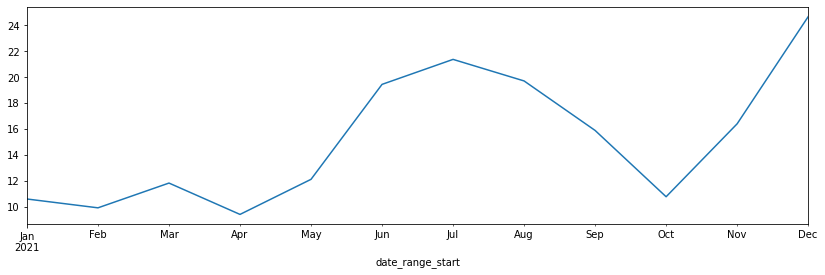

In [ ]:
df.loc['2021'].resample('M').mean()['distance_from_home'].plot(figsize=(14,4));

# Hospitals

In [ ]:
df['placekey'].nunique()

7126

In [ ]:
df['placekey'].value_counts().head(10)

224-223@627-s8j-tsq    156
22k-222@627-s4n-whq    156
zzw-223@627-s4n-gp9    156
zzy-222@627-wg9-rrk    156
226-222@627-s4r-kfz    156
zzw-22c@627-wgt-qvf    156
224-222@627-s4k-gkz    156
22b-222@627-s4m-xbk    156
zzy-222@627-wdb-f2k    156
222-223@627-s4n-nkf    156
Name: placekey, dtype: int64

In [ ]:
df.columns

Index(['placekey', 'location_name', 'brands', 'latitude', 'longitude',
       'region', 'postal_code', 'iso_country_code', 'opened_on', 'closed_on',
       'tracking_closed_since', 'raw_visit_counts', 'raw_visitor_counts',
       'visits_by_day', 'visitor_home_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_week_brand',
       'related_same_day_brand.1', 'poi_cbg', 'visitor_home_aggregation',
       'visitor_daytime_cbgs', 'countyfips', 'year', 'month'],
      dtype='object')

In [ ]:
df['countyfips'].nunique()

5

In [ ]:
df['countyfips'].unique()

array(['36061', '36085', '36047', '36005', '36081'], dtype=object)

In [ ]:
df['countyfips'].value_counts()

36061    313896
36047      6530
36005      1974
36085      1625
36081       693
Name: countyfips, dtype: int64

- 36061: New York County 
- 36047: Kings County
- 36005: Brox County
- 36085: Richmond County
- 36081: Queens County

In [ ]:
df.columns

Index(['placekey', 'location_name', 'brands', 'latitude', 'longitude',
       'region', 'postal_code', 'iso_country_code', 'opened_on', 'closed_on',
       'tracking_closed_since', 'raw_visit_counts', 'raw_visitor_counts',
       'visits_by_day', 'visitor_home_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_week_brand',
       'related_same_day_brand.1', 'poi_cbg', 'visitor_home_aggregation',
       'visitor_daytime_cbgs', 'countyfips', 'year', 'month'],
      dtype='object')

# Brands

In [ ]:
df['brands'].nunique()

17

In [ ]:
set(df['brands'].unique())

{'CityMD',
 'Cohen’s Fashion Optical',
 'DaVita',
 'Excel Urgent Care',
 'FYSICAL',
 'Fresenius Kidney Care',
 'GoHealth Urgent Care',
 'MinuteClinic',
 'Modern Acupuncture',
 'Montefiore',
 'Northwell Health',
 'One Medical',
 'Planned Parenthood',
 'Schweiger Dermatology',
 'Smile Direct Club',
 'Sono Bello',
 'USA Vein Clinics',
 nan}

In [ ]:
df['brands'].value_counts()

Northwell Health           3246
Cohen’s Fashion Optical     845
CityMD                      835
GoHealth Urgent Care        622
USA Vein Clinics            422
One Medical                 317
Planned Parenthood          297
DaVita                      249
Fresenius Kidney Care       228
FYSICAL                     154
Schweiger Dermatology       116
Excel Urgent Care            68
Smile Direct Club            38
Sono Bello                   29
MinuteClinic                 20
Montefiore                   16
Modern Acupuncture           10
Name: brands, dtype: int64

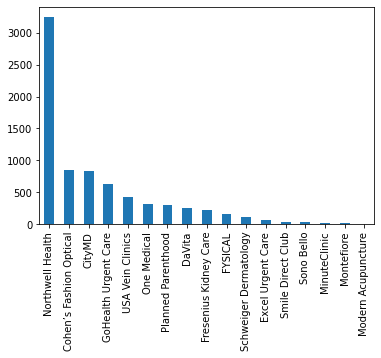

In [ ]:
df['brands'].value_counts().plot(kind='bar');

In [ ]:
# how many nonbrand
nonbrand = df['brands'].isnull().sum()
nonbrand

317206

In [ ]:
# how many brand hospitals?
len(df) - nonbrand

7512

In [ ]:
# create brandyesno column
df['brands'] = df['brands'].fillna(0)
df.head(2)

,placekey,location_name,brands,latitude,longitude,region,postal_code,iso_country_code,opened_on,closed_on,tracking_closed_since,raw_visit_counts,raw_visitor_counts,visits_by_day,visitor_home_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,related_same_day_brand.1,poi_cbg,visitor_home_aggregation,visitor_daytime_cbgs,countyfips,year,month
date_range_start,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-07,224-223@627-s8j-tsq,New York University Langone Medical Center,0,40.741854,-73.974095,NY,10016,US,NaN,NaN,2019-07-01,71.0,42.0,"[5,18,16,10,16,5,1]","{""360470098004"":4,""360610285002"":4,""3605952180...","{""US"":39}",7.726751,231.0,"{""<5"":1,""5-10"":4,""11-20"":1,""21-60"":8,""61-120"":...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...","{""Starbucks"":14,""Dunkin'"":10,""Walmart"":7,""Targ...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...",360610062001,"{""36081032800"":4,""36047001500"":4,""36085024700""...","{""360610062001"":11,""360470050002"":4,""360470015...",36061,2019,1
2019-01-07,zzw-222@627-s8s-2zf,Kofinas Fertility Group,0,40.772198,-73.979171,NY,10023,US,NaN,NaN,2019-07-01,46.0,38.0,"[3,9,4,16,2,7,5]","{""360610132004"":4,""360595182041"":4,""3606101490...","{""US"":29,""TZ"":4}",8.070369,9.5,"{""<5"":5,""5-10"":20,""11-20"":5,""21-60"":6,""61-120""...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...","{""Starbucks"":26,""McDonald's"":24,""CVS"":13,""Dunk...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...",360610149002,"{""36047043600"":4,""36061019300"":4,""36081015802""...","{""360610149003"":4,""360050221013"":4,""3606101550...",36061,2019,1


In [ ]:
df['brandsyesno'] = df.brands.where(df['brands'] == 0, 1)
df.head(2)

,placekey,location_name,brands,latitude,longitude,region,postal_code,iso_country_code,opened_on,closed_on,tracking_closed_since,raw_visit_counts,raw_visitor_counts,visits_by_day,visitor_home_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,related_same_day_brand.1,poi_cbg,visitor_home_aggregation,visitor_daytime_cbgs,countyfips,year,month,brandsyesno
date_range_start,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-07,224-223@627-s8j-tsq,New York University Langone Medical Center,0,40.741854,-73.974095,NY,10016,US,NaN,NaN,2019-07-01,71.0,42.0,"[5,18,16,10,16,5,1]","{""360470098004"":4,""360610285002"":4,""3605952180...","{""US"":39}",7.726751,231.0,"{""<5"":1,""5-10"":4,""11-20"":1,""21-60"":8,""61-120"":...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...","{""Starbucks"":14,""Dunkin'"":10,""Walmart"":7,""Targ...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...",360610062001,"{""36081032800"":4,""36047001500"":4,""36085024700""...","{""360610062001"":11,""360470050002"":4,""360470015...",36061,2019,1,0
2019-01-07,zzw-222@627-s8s-2zf,Kofinas Fertility Group,0,40.772198,-73.979171,NY,10023,US,NaN,NaN,2019-07-01,46.0,38.0,"[3,9,4,16,2,7,5]","{""360610132004"":4,""360595182041"":4,""3606101490...","{""US"":29,""TZ"":4}",8.070369,9.5,"{""<5"":5,""5-10"":20,""11-20"":5,""21-60"":6,""61-120""...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...","{""Starbucks"":26,""McDonald's"":24,""CVS"":13,""Dunk...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...",360610149002,"{""36047043600"":4,""36061019300"":4,""36081015802""...","{""360610149003"":4,""360050221013"":4,""3606101550...",36061,2019,1,0


In [ ]:
df['brandsyesno'].value_counts()

0    317206
1      7512
Name: brandsyesno, dtype: int64

In [ ]:
# number of unique nonbranded hospital names
df[df['brandsyesno'] == 0]['location_name'].nunique()

6707

In [ ]:
nonbrand_valuecounts  = df[df['brandsyesno'] == 0]['location_name'].value_counts()
nonbrand_valuecounts.head(20)

New York Presbyterian Hospital New York Weill Cornell Medical Ce    936
Mount Sinai Hospitals                                               896
New York Presbyterian Hospital                                      582
New York Foundling Hospital                                         560
Professional Physical Therapy                                       458
NYU Langone                                                         360
Abiola Dele Michael MD FACC                                         334
Tribeca Pediatrics                                                  327
Starrett Podiatry                                                   313
Central Park Midwifery                                              312
Weill Cornell Medicine Hearing and Speech Center                    301
Marmur Medical                                                      300
New York Presbyterian Hospital Columbia Presbyterian Medical Cen    298
Triumph Physical Therapy                                        

In [ ]:
df['placekey'].nunique()

7126

# distance_from_home

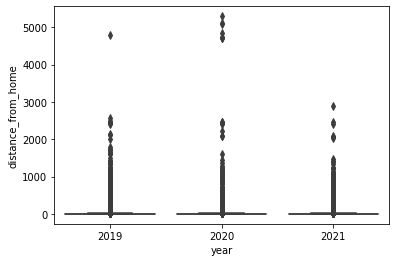

In [ ]:
sns.boxplot(x="year", y="distance_from_home", data=df);

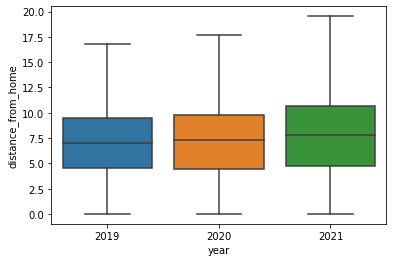

In [ ]:
sns.boxplot(x="year", y="distance_from_home", data=df, showfliers=False);

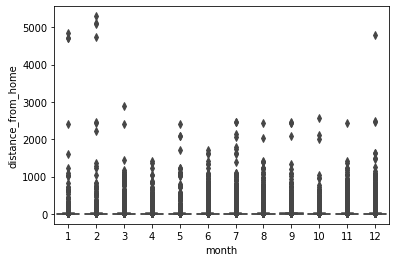

In [ ]:
sns.boxplot(x="month", y="distance_from_home", data=df);

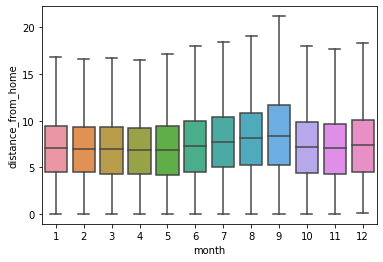

In [ ]:
sns.boxplot(x="month", y="distance_from_home", data=df, showfliers=False);

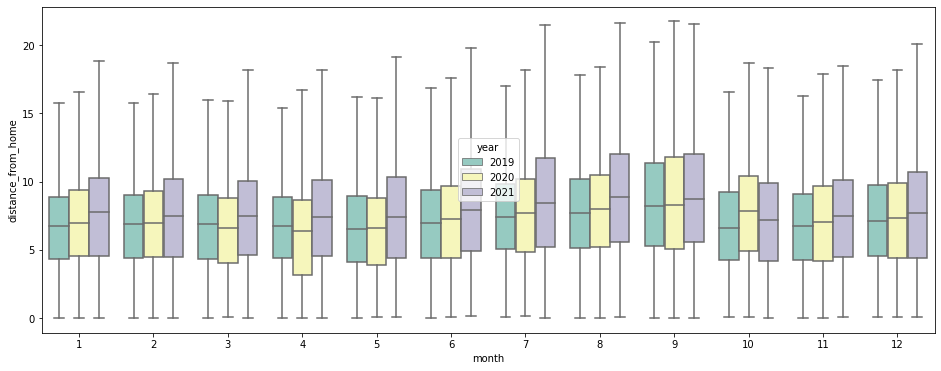

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x="month", y="distance_from_home", data=df, hue='year', showfliers=False, palette="Set3");

In [ ]:
df.head(2)

,placekey,location_name,brands,latitude,longitude,region,postal_code,iso_country_code,opened_on,closed_on,tracking_closed_since,raw_visit_counts,raw_visitor_counts,visits_by_day,visitor_home_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,related_same_day_brand.1,poi_cbg,visitor_home_aggregation,visitor_daytime_cbgs,countyfips,year,month,brandsyesno
date_range_start,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-07,224-223@627-s8j-tsq,New York University Langone Medical Center,0,40.741854,-73.974095,NY,10016,US,NaN,NaN,2019-07-01,71.0,42.0,"[5,18,16,10,16,5,1]","{""360470098004"":4,""360610285002"":4,""3605952180...","{""US"":39}",7.726751,231.0,"{""<5"":1,""5-10"":4,""11-20"":1,""21-60"":8,""61-120"":...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...","{""Starbucks"":14,""Dunkin'"":10,""Walmart"":7,""Targ...","{""Starbucks"":4,""Dunkin'"":4,""Blink Fitness"":3,""...",360610062001,"{""36081032800"":4,""36047001500"":4,""36085024700""...","{""360610062001"":11,""360470050002"":4,""360470015...",36061,2019,1,0
2019-01-07,zzw-222@627-s8s-2zf,Kofinas Fertility Group,0,40.772198,-73.979171,NY,10023,US,NaN,NaN,2019-07-01,46.0,38.0,"[3,9,4,16,2,7,5]","{""360610132004"":4,""360595182041"":4,""3606101490...","{""US"":29,""TZ"":4}",8.070369,9.5,"{""<5"":5,""5-10"":20,""11-20"":5,""21-60"":6,""61-120""...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...","{""Starbucks"":26,""McDonald's"":24,""CVS"":13,""Dunk...","{""Starbucks"":10,""Flywheel"":5,""Le Pain Quotidie...",360610149002,"{""36047043600"":4,""36061019300"":4,""36081015802""...","{""360610149003"":4,""360050221013"":4,""3606101550...",36061,2019,1,0


In [ ]:
df19april = df.loc['2019-04']
print(len(df19april))

12256


In [ ]:
df20april = df.loc['2020-04']
print(len(df20april))

5401


In [ ]:
dfapril = df19april.append(df20april)
dfapril.head(2)

,placekey,location_name,brands,latitude,longitude,region,postal_code,iso_country_code,opened_on,closed_on,tracking_closed_since,raw_visit_counts,raw_visitor_counts,visits_by_day,visitor_home_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,related_same_day_brand.1,poi_cbg,visitor_home_aggregation,visitor_daytime_cbgs,countyfips,year,month,brandsyesno
date_range_start,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,zzy-222@627-s4m-ty9,NYC Lipo LLC,0,40.779496,-73.959248,NY,10028,US,NaN,NaN,2019-07-01,23.0,18.0,"[7,3,5,5,2,0,1]","{""360593016004"":4,""360593011012"":4,""3611900210...","{""US"":18}",12.729410,499.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":0,""61-120"":...","{""Le Pain Quotidien"":13,""Au Bon Pain"":9,""Rita'...","{""Le Pain Quotidien"":72,""Starbucks"":22,""Hyatt ...","{""Le Pain Quotidien"":13,""Au Bon Pain"":9,""Rita'...",360610150011,"{""36119002103"":4,""36047037402"":4,""36061016600""...","{""360610166003"":4,""361190125011"":4,""3401701870...",36061,2019,4,0
2019-04-01,222-222@627-s4m-wc5,Michelle Copeland MD DMD,0,40.778671,-73.962316,NY,10028,US,NaN,NaN,2019-07-01,123.0,112.0,"[9,7,22,15,21,33,16]","{""340076082112"":6,""121030215003"":4,""1100101060...","{""US"":95}",139.046096,21.0,"{""<5"":3,""5-10"":26,""11-20"":25,""21-60"":44,""61-12...","{""Starbucks"":10,""Subway"":4,""Shake Shack"":3,""Ha...","{""Starbucks"":27,""McDonald's"":12,""Dunkin'"":9,""S...","{""Starbucks"":10,""Subway"":4,""Shake Shack"":3,""Ha...",360610142005,"{""36005041500"":7,""25003921500"":6,""36005045600""...","{""360470326005"":6,""360470234001"":6,""3600504070...",36061,2019,4,0


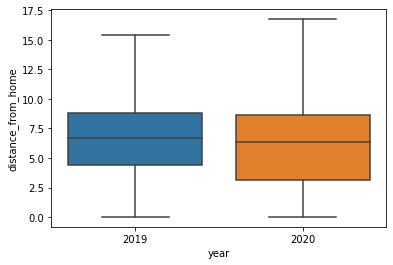

In [ ]:
sns.boxplot(x="year", y="distance_from_home", data=dfapril, showfliers=False);

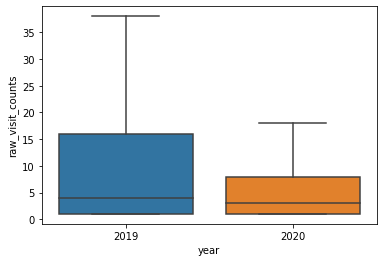

In [ ]:
sns.boxplot(x="year", y="raw_visit_counts", data=dfapril, showfliers=False);

# raw_visit_counts

In [ ]:
df.columns

Index(['placekey', 'location_name', 'brands', 'latitude', 'longitude',
       'region', 'postal_code', 'iso_country_code', 'opened_on', 'closed_on',
       'tracking_closed_since', 'raw_visit_counts', 'raw_visitor_counts',
       'visits_by_day', 'visitor_home_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_week_brand',
       'related_same_day_brand.1', 'poi_cbg', 'visitor_home_aggregation',
       'visitor_daytime_cbgs', 'countyfips', 'year', 'month', 'brandsyesno'],
      dtype='object')

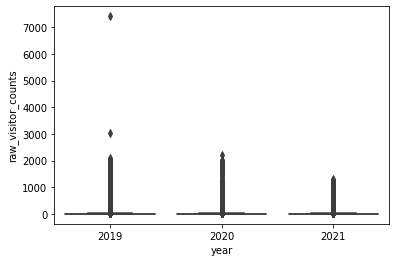

In [ ]:
sns.boxplot(x="year", y="raw_visitor_counts", data=df);

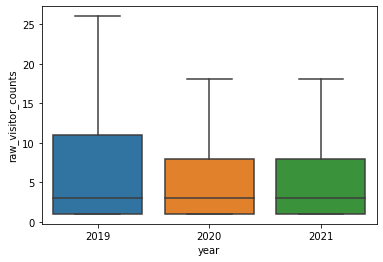

In [ ]:
sns.boxplot(x="year", y="raw_visitor_counts", data=df, showfliers=False);

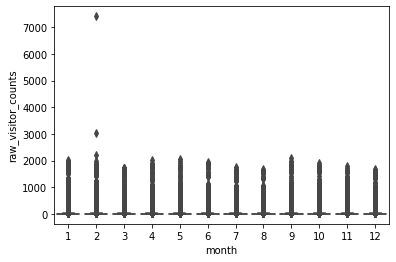

In [ ]:
sns.boxplot(x="month", y="raw_visitor_counts", data=df);

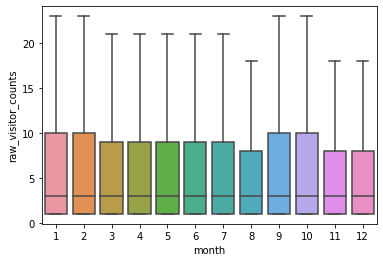

In [ ]:
sns.boxplot(x="month", y="raw_visitor_counts", data=df, showfliers=False);

# poi_cbg

In [ ]:
df.columns

Index(['placekey', 'location_name', 'brands', 'latitude', 'longitude',
       'region', 'postal_code', 'iso_country_code', 'opened_on', 'closed_on',
       'tracking_closed_since', 'raw_visit_counts', 'raw_visitor_counts',
       'visits_by_day', 'visitor_home_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_week_brand',
       'related_same_day_brand.1', 'poi_cbg', 'visitor_home_aggregation',
       'visitor_daytime_cbgs', 'countyfips', 'year', 'month', 'brandsyesno'],
      dtype='object')

In [ ]:
df['poi_cbg'].nunique()

878

In [ ]:
uniquehospitals = df.drop_duplicates('placekey', keep='last')
len(uniquehospitals)

7126

In [ ]:
uniquehospitals['poi_cbg'].nunique()

875

In [ ]:
df.columns

Index(['placekey', 'location_name', 'brands', 'latitude', 'longitude',
       'region', 'postal_code', 'iso_country_code', 'opened_on', 'closed_on',
       'tracking_closed_since', 'raw_visit_counts', 'raw_visitor_counts',
       'visits_by_day', 'visitor_home_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_week_brand',
       'related_same_day_brand.1', 'poi_cbg', 'visitor_home_aggregation',
       'visitor_daytime_cbgs', 'countyfips', 'year', 'month', 'brandsyesno'],
      dtype='object')

In [ ]:
import folium

In [ ]:
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Functions for simple mapping using folium 
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def make_map_plot(df_, 
                  plot_limit=3000, 
                  radius_col=None, 
                  radius_mod=100, 
                  color='black', 
                  fill_color='red', 
                  fill_opacity = 0.08, 
                  pop_up_col=None,
                  tooltip = 'Click for more info.', 
                  zoom_start=4,
                  tiles = 'OpenStreetMap', 
                  map_width = 1000,
                  map_height = 700,
                  marker_type= 'circle', 
                  map_plot=None, 
                  verbose=False):
    # Parameters:
      # df_ is a pandas dataframe. It requires a column called "latitude" and a column called "longitude". 
      # radius_col is a column_name or None. If None, every point is given a fixed radius. 
          # Otherwise, the value in the column radius_col is used as the radius. 
      # radius_mod is to scale your radius units to correspond to units on your map.
      # zoom_start is the scale of the map. Larger numbers = higher resolution.
      # color, fill_color, fill_opacity are marker parameters, see others: https://leafletjs.com/reference-1.3.4.html#path 
      # tiles determines the base layer. Open source options include 'OpenStreetMap', 'Stamen Terrain', 'Stamen Toner'
      # map_width and map_height determine the size of the map image (in pixels)
      # marker_type determines what type of marker is being drawn on the map. Options: 'circle' or 'normal'

    # check valid inputs
    valid_inputs = {'marker_type' : {'val' : marker_type, 'valids' : ['circle', 'normal']},
                    'tiles' :  {'val' : tiles, 'valids': ['OpenStreetMap', 'Stamen Terrain', 'Stamen Toner', 'Mapbox Bright', 'Mapbox Control Room']},
                    'radius_col' : {'val' : radius_col, 'valids' : [None] + [col for col in df_.columns if pd.api.types.is_numeric_dtype(df_[col])]}}
    for param, param_valid_dict in valid_inputs.items():
      if(param_valid_dict['val'] not in param_valid_dict['valids']):
        raise Exception("Invalid parameter input for '{0}'. Valid options are {1}. input value was '{2}' .".format(param, param_valid_dict['valids'], param_valid_dict['val']))   

    # create basemap
    if(not map_plot):
      map_plot = folium.Map(width=map_width,
                            height=map_height,
                            location=[df_.latitude.mean(), df_.longitude.mean()],
                            tiles=tiles,
                            zoom_start=zoom_start,
                            control_scale = True)

    # add markers
    counter = 0
    for index, row in df_.iterrows():
        counter+=1
        if(marker_type=='circle'):
          add_circle_marker_to_map(map_plot, row, radius_col, radius_mod, color, fill_color, fill_opacity, pop_up_col, tooltip)
        elif(marker_type=='normal'):
          add_marker_to_map(map_plot, row, pop_up_col, tooltip)
        if(counter>plot_limit): break
    if(verbose): print("Plotted {0} locations".format(counter))
    return(map_plot)


def add_marker_to_map(map_plot, row, pop_up_col, tooltip):
  folium.Marker([row.latitude, row.longitude],
                        popup= folium.Popup(row[pop_up_col] if pop_up_col else None),
                        tooltip=tooltip if pop_up_col else None,
                   ).add_to(map_plot)
  return(None)


def add_circle_marker_to_map(map_plot, row, radius_col, radius_mod, color, fill_color, fill_opacity, pop_up_col, tooltip):
  folium.CircleMarker([row.latitude, row.longitude],
                        radius= row[radius_col]/radius_mod if radius_col else 2,
                        color = color,
                        fill_color = fill_color,
                        weight=0.5,
                        fill_opacity= fill_opacity,
                        popup= folium.Popup(row[pop_up_col] if pop_up_col else None),
                        tooltip=tooltip if pop_up_col else None,
                   ).add_to(map_plot)
  return(None)

In [ ]:
df.columns

Index(['placekey', 'location_name', 'brands', 'latitude', 'longitude',
       'region', 'postal_code', 'iso_country_code', 'opened_on', 'closed_on',
       'tracking_closed_since', 'raw_visit_counts', 'raw_visitor_counts',
       'visits_by_day', 'visitor_home_cbgs', 'visitor_country_of_origin',
       'distance_from_home', 'median_dwell', 'bucketed_dwell_times',
       'related_same_day_brand', 'related_same_week_brand',
       'related_same_day_brand.1', 'poi_cbg', 'visitor_home_aggregation',
       'visitor_daytime_cbgs', 'countyfips', 'year', 'month', 'brandsyesno'],
      dtype='object')

In [ ]:
m = make_map_plot(df['2019-04-01':'2019-12-31'],
                  pop_up_col='' 
                  fill_color='blue', 
                  fill_opacity=1,
                  zoom_start=11, )
m